<a href="https://colab.research.google.com/github/FaatihFath/Praktikum---Machine-Learning/blob/main/Praktikum_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Praktikum Machine Learning/Praktikum 11"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv(path+"/Data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# cek missing Value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#menampilkan data statistik deskriptif dari dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# cek nilai pada kolom species
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Menghitung Jumlah kolom Species
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# Pemilihan Fitur (Pemisahan antara fitur X dan label Y)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])
df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesEncoded
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


In [ ]:
# Fitur Clustering
X = df.drop(["Species", "SpeciesEncoded"], axis=1)

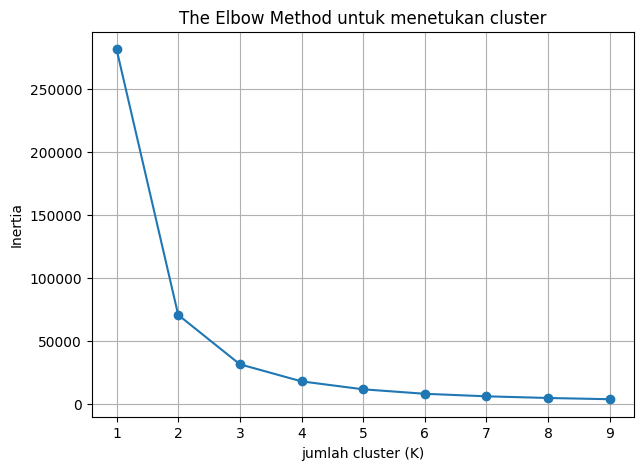

In [ ]:
# Menentukan jumlah cluster (K) dengan elbow method
from sklearn.cluster import KMeans

intertia_list = []
K_range = range(1, 10)
for k in K_range:
    km= KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    intertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, intertia_list, marker='o')
plt.title("The Elbow Method untuk menetukan cluster")
plt.xlabel("jumlah cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# membangun Model K - Means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42, n_init=10)
km.fit(X)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
df["cluster"] = km.fit_predict(X)
print("Cluster Ditemukan :", df["cluster"].unique())

Cluster Ditemukan : [2 0 1]


In [ ]:
# Evaluasi Kualitas Clustering

from sklearn.metrics import silhouette_score
score = silhouette_score(X, df["cluster"])
print("Silhouette Score :", score)

Silhouette Score : 0.5816702617893469


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(" CONFUSION MATRIX ")
cm = confusion_matrix(df["SpeciesEncoded"], df["cluster"])
print(cm)

 CONFUSION MATRIX 
[[ 1  0 49]
 [49  1  0]
 [ 0 50  0]]


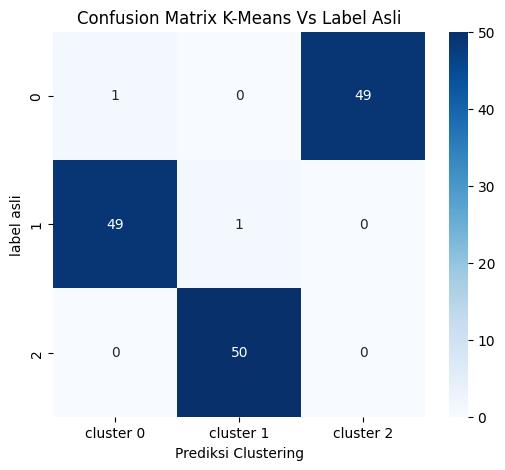

In [ ]:
plt.figure (figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["cluster 0", "cluster 1", "cluster 2"],
    yticklabels=le.classes_
)
plt.title("Confusion Matrix K-Means Vs Label Asli")
plt.xlabel("Prediksi Clustering")
plt.ylabel("label asli")
plt.show()



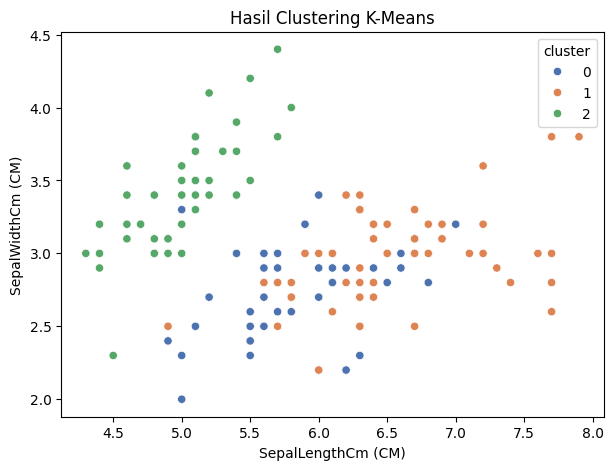

In [ ]:
# 2D dan 3D Visualisasi Hasil model K-Means
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["cluster"],
    palette="deep"
)
plt.title("Hasil Clustering K-Means")
plt.xlabel("SepalLengthCm (CM)")
plt.ylabel("SepalWidthCm (CM)")
plt.show()

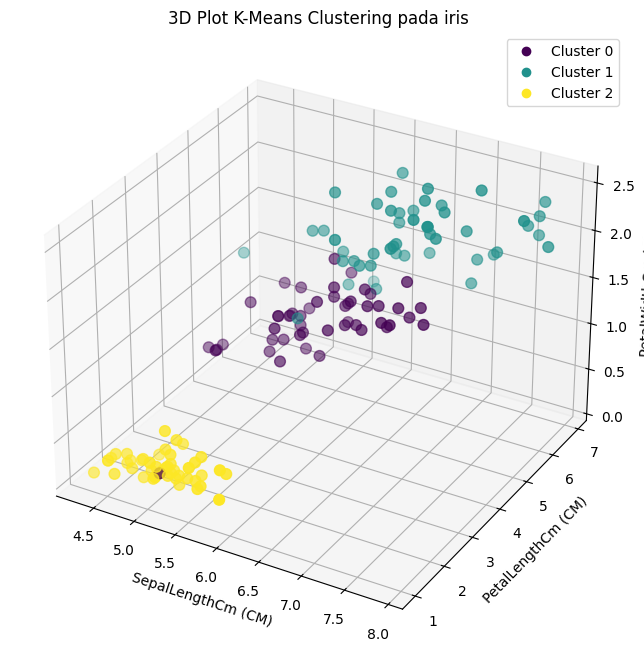

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["cluster"],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada iris")
ax.set_xlabel("SepalLengthCm (CM)")
ax.set_ylabel("PetalLengthCm (CM)")
ax.set_zlabel("PetalWidthCm (CM)")

# Legend Cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0],labels=legend_labels)

plt.show()
